<a href="https://colab.research.google.com/github/asurovi/MSE504_MachineLearning/blob/main/Homework_9_AgnilaGhoshSurovi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 9 (DCNN, AEs and VAEs)

**Date:** 11/09/2025

**Name:** Agnila Ghosh Surovi

**Department**: Mechanical and Aerospace Engineering (MAE)

In this homework, we will explore the use of ChatGPT as a code assistant to help understand and operationalize neural networks. As we discussed during the class, ChatGPT does an excellent work with simple code development - as long as the tasks are well formulated and we can check the code and results.

# Fashion MNIST classifier

Example prompt: "Write a Python code importing fashion MNIST data set and visualizing 10 random images along with the labels"

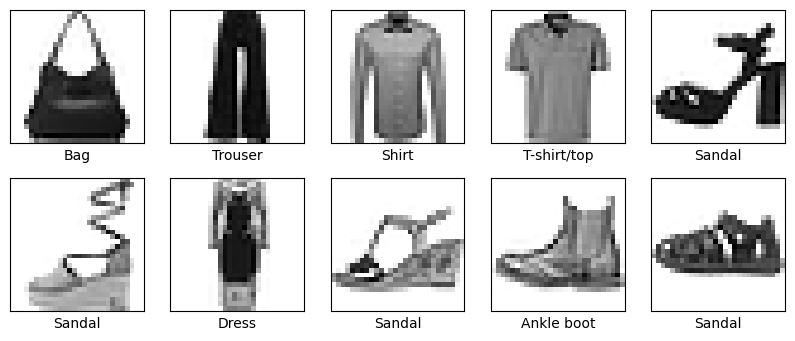

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Set the figure size
plt.figure(figsize=(10, 4))

# Select 10 random indices
random_indices = np.random.choice(len(train_images), 10)

# Plot images and labels
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[idx], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[idx]])

plt.show()

1. Ask ChatGPT to write a DCNN classifier for Fashion-MNIST data. Specify that the network should use the dropout layers and normalization layers. Code should save the trained network weights, and also save history (loss and accuracy).

## Answer 1:

Model: "fmnist_dcnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_6 (Rescaling)         │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_47          │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_47 (Activation)      │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_48          │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_48 (Activation)      │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_49          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_49 (Activation)      │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_50          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_50 (Activation)      │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_51          │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_51 (Activation)      │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_52          │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 586,986 (2.24 MB)

 Trainable params: 585,578 (2.23 MB)

 Non-trainable params: 1,408 (5.50 KB)

Epoch 1/15

Epoch 1: val_accuracy improved from -inf to 0.67050, saving model to best_model.keras
422/422 - 23s - 55ms/step - accuracy: 0.8009 - loss: 0.5428 - val_accuracy: 0.6705 - val_loss: 1.0111
Epoch 2/15

Epoch 2: val_accuracy improved from 0.67050 to 0.89350, saving model to best_model.keras
422/422 - 5s - 12ms/step - accuracy: 0.8793 - loss: 0.3295 - val_accuracy: 0.8935 - val_loss: 0.2724
Epoch 3/15

Epoch 3: val_accuracy improved from 0.89350 to 0.90283, saving model to best_model.keras
422/422 - 5s - 12ms/step - accuracy: 0.8957 - loss: 0.2853 - val_accuracy: 0.9028 - val_loss: 0.2571
Epoch 4/15

Epoch 4: val_accuracy improved from 0.90283 to 0.91700, saving model to best_model.keras
422/422 - 5s - 12ms/step - accuracy: 0.9060 - loss: 0.2550 - val_accuracy: 0.9170 - val_loss: 0.2217
Epoch 5/15

Epoch 5: val_accuracy did not improve from 0.91700
422/422 - 5s - 12ms/step - accuracy: 0.9118 - loss: 0.2403 - val_accuracy: 0.9015 - val_loss: 0.2651
Epoch 6/15

Epoch 6: val_accur

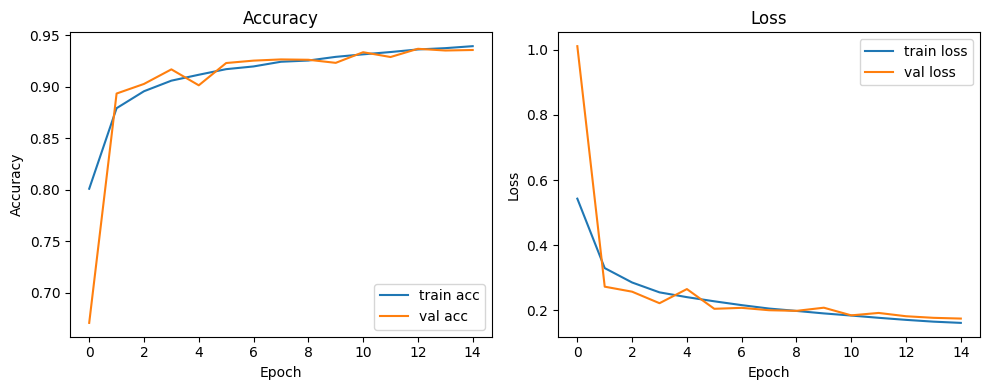

Saved files:
- best_model.keras
- final_weights.weights.h5
- history.csv
- history.json


In [ ]:
# Uses Dropout + BatchNormalization, saves best model and training history

import json
from tensorflow.keras import layers, models

# --- Preprocess: add channel dim, convert to float; rescaling done in the model ---
x_train = train_images[..., np.newaxis].astype("float32")
y_train = train_labels.astype("int64")
x_test  = test_images[..., np.newaxis].astype("float32")
y_test  = test_labels.astype("int64")

def build_dcnn(input_shape=(28, 28, 1), num_classes=10, dropout=0.3):
    model = models.Sequential([
        tf.keras.Input(shape=input_shape),
        layers.Rescaling(1.0/255.0)
    ], name="fmnist_dcnn")

    # Block 1
    model.add(layers.Conv2D(32, (3,3), padding='same', activation=None))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Conv2D(32, (3,3), padding='same', activation=None))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Dropout(dropout))

    # Block 2
    model.add(layers.Conv2D(64, (3,3), padding='same', activation=None))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Conv2D(64, (3,3), padding='same', activation=None))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Dropout(dropout))

    # Block 3
    model.add(layers.Conv2D(128, (3,3), padding='same', activation=None))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Conv2D(128, (3,3), padding='same', activation=None))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Dropout(dropout))

    # Classifier head
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation=None))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(dropout))
    model.add(layers.Dense(num_classes, activation='softmax'))

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

model = build_dcnn(input_shape=x_train.shape[1:])
model.summary()

# --- Callbacks: best model checkpoint, early stopping, CSV history ---
ckpt_path = "best_model.keras"          # full model (architecture+weights)
csv_path  = "history.csv"               # training log
history_cb = tf.keras.callbacks.CSVLogger(csv_path)
ckpt_cb    = tf.keras.callbacks.ModelCheckpoint(
    ckpt_path, monitor="val_accuracy", save_best_only=True, verbose=1
)
early_cb   = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy", patience=5, restore_best_weights=True, verbose=1
)

# --- Train ---
history = model.fit(
    x_train, y_train,
    validation_split=0.1,
    epochs=15,
    batch_size=128,
    callbacks=[history_cb, ckpt_cb, early_cb],
    verbose=2
)

# --- Evaluate ---
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test loss: {test_loss:.4f} | Test accuracy: {test_acc:.4f}")

# --- Save final weights and history (JSON) ---
model.save_weights("final_weights.weights.h5")  # weights only
with open("history.json", "w") as f:
    json.dump(history.history, f, indent=2)

# --- Plot training curves ---
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend(); plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend(); plt.title('Loss')
plt.tight_layout()
plt.show()

print("Saved files:\n- best_model.keras\n- final_weights.weights.h5\n- history.csv\n- history.json")

2. Plot the evolution of the loss and accuracy for trianing and test data

## Answer 2:

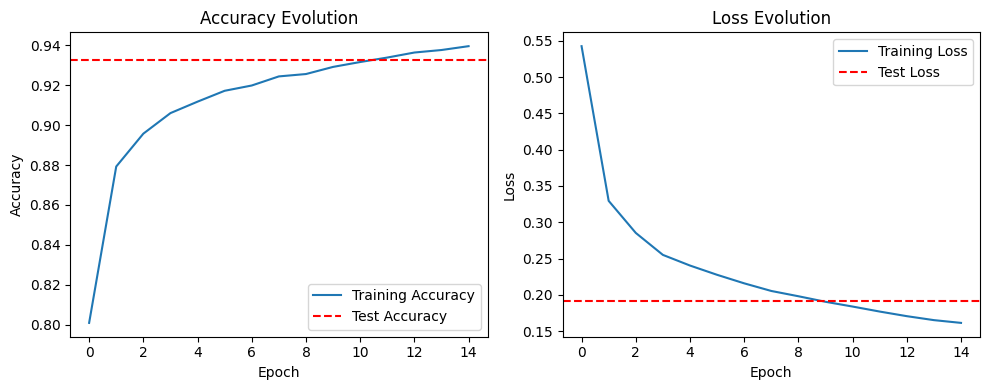

In [ ]:
# Plot the evolution of the loss and accuracy for training and test data

import matplotlib.pyplot as plt

# Evaluate the model on test data to get test loss and accuracy
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

# Plot training vs test accuracy
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.axhline(y=test_acc, color='r', linestyle='--', label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Evolution')
plt.legend()

# Plot training vs test loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Evolution')
plt.legend()

plt.tight_layout()
plt.show()


3. Ask ChatGPT to write the code to plot the ROC curve for the classifier

## Answer 3:

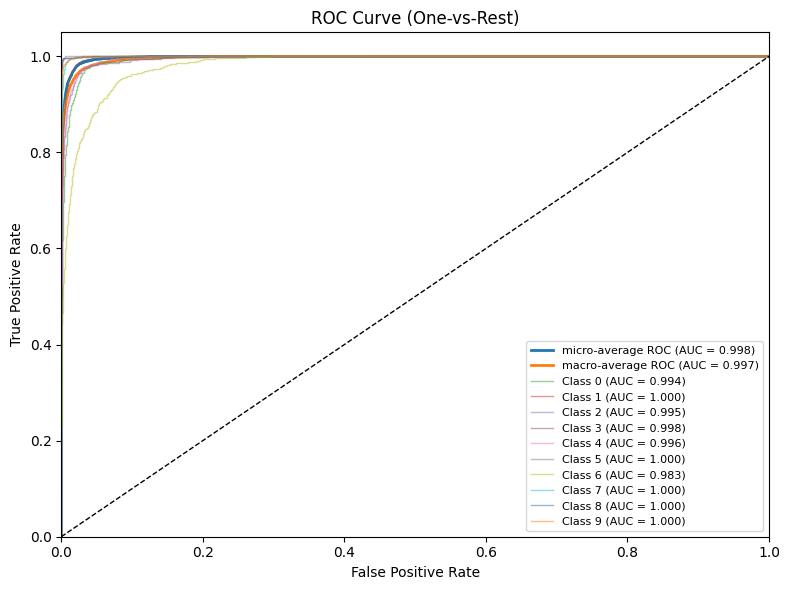

In [ ]:
# Plot ROC curves for the classifier (multiclass, one-vs-rest)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# y_test: integer labels [0..9], model: trained Keras model, x_test: test images
n_classes = 10
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# Probabilities for each class
y_score = model.predict(x_test, verbose=0)   # shape (N, 10)

# Compute ROC curve and ROC area for each class
fpr = dict(); tpr = dict(); roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Micro-average
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Macro-average
# First aggregate all FPR points
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at these points and average
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot
plt.figure(figsize=(8,6))
plt.plot(fpr["micro"], tpr["micro"],
         label=f'micro-average ROC (AUC = {roc_auc["micro"]:.3f})', linewidth=2)
plt.plot(fpr["macro"], tpr["macro"],
         label=f'macro-average ROC (AUC = {roc_auc["macro"]:.3f})', linewidth=2)

# (Optional) per-class curves: uncomment to show all
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], alpha=0.5, lw=1,
             label=f'Class {i} (AUC = {roc_auc[i]:.3f})')

plt.plot([0,1], [0,1], 'k--', lw=1)
plt.xlim([0.0, 1.0]); plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.title('ROC Curve (One-vs-Rest)')
plt.legend(loc='lower right', fontsize=8)
plt.tight_layout()
plt.show()


4. Ask ChatGPT (and provide answers below):
- What is the dimensionality of the input to the classifier?
- What is the dimensionality of the output?
- Why the loss function is chosen?
- What is the metrics for performance?
- What is the role of MaxPool layers?
- What is the role of batch normalization layers?
- Can we use the Relu rather then softmax in the final layer
- What is the function of dropout layers?

## Answer 4:


**1️⃣ What is the dimensionality of the input to the classifier?**

The input to the DCNN is a **28 × 28 × 1** tensor — each Fashion-MNIST image has height 28, width 28, and one grayscale channel.

---

**2️⃣ What is the dimensionality of the output?**

The output layer has **10 neurons**, one for each class in Fashion-MNIST (`T-shirt/top`, `Trouser`, …, `Ankle boot`).
Hence, the output dimensionality is **10 × 1** (a 10-element probability vector).

---

**3️⃣ Why was this loss function chosen?**

The model uses **`sparse_categorical_crossentropy`** because:

* The task is **multiclass classification** (one label per image).
* The targets (`y_train`, `y_test`) are **integer-encoded**, not one-hot vectors.
  This loss measures the difference between the true class index and the predicted class probabilities from the softmax layer.

---

**4️⃣ What is the metric for performance?**

The performance metric is **accuracy**, which calculates the fraction of correctly predicted labels over the total number of samples.

---

**5️⃣ What is the role of MaxPool layers?**

**Max-Pooling** layers down-sample the feature maps by taking the maximum value within a local window (e.g., 2×2).
They:

* Reduce spatial resolution → fewer parameters and faster computation.
* Provide translation invariance → help the network focus on the most salient features.
* Prevent overfitting by reducing the network’s capacity.

---

**6️⃣ What is the role of Batch Normalization layers?**

**Batch Normalization** normalizes activations within a mini-batch to have zero mean and unit variance.
It:

* Stabilizes and speeds up training.
* Allows higher learning rates.
* Reduces sensitivity to initialization.
* Acts as a mild regularizer.

---

**7️⃣ Can we use ReLU instead of Softmax in the final layer?**

No.
The **final layer** must produce a **probability distribution** across the 10 classes.

* **Softmax** converts raw scores into normalized probabilities that sum to 1.
* **ReLU** outputs unbounded positive numbers, making it impossible to interpret the outputs as probabilities or use cross-entropy loss correctly.

---

**8️⃣ What is the function of Dropout layers?**

**Dropout** randomly sets a fraction of activations (e.g., 30%) to zero during training.
This:

* Prevents **co-adaptation** of neurons.
* Improves **generalization** by simulating an ensemble of subnetworks.
* Reduces **overfitting** on the training data.

---


5. Perform the ablation study. Rewrite the code so that:
- we change the number of neurons (let's say divide it by factor of two several times)
- save the training curve
- save the ROC curve
And then plot them jointly. For example, if originally you had neural network with (128, 256) neurons, then you will generate training and ROC curves for (128,256), (64,  128), (32, 64), AND (16, 32).

## Answer 5:


=== Training width config: 128-256 ===


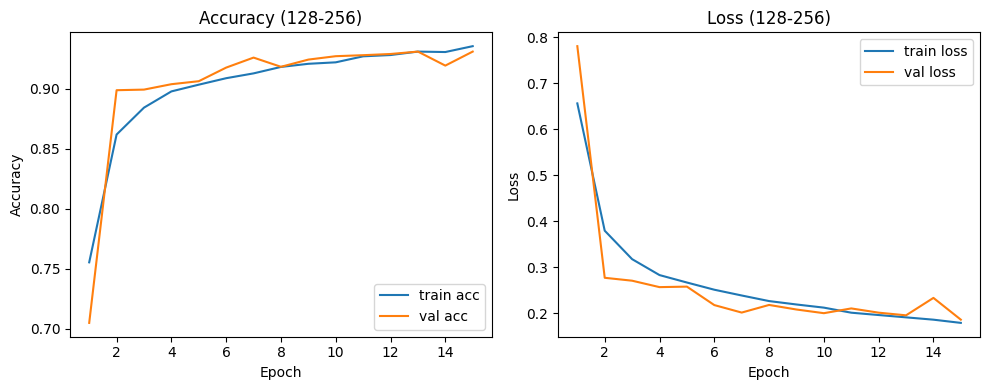

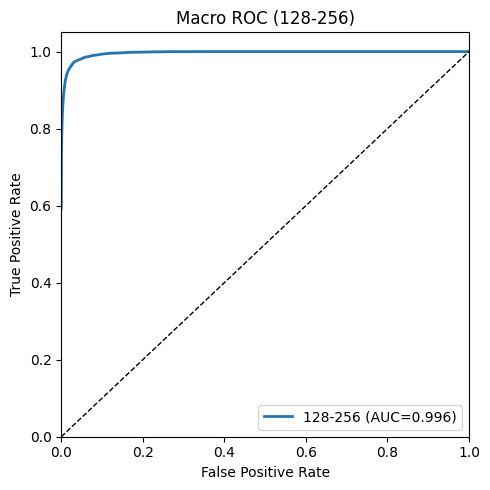


=== Training width config: 64-128 ===


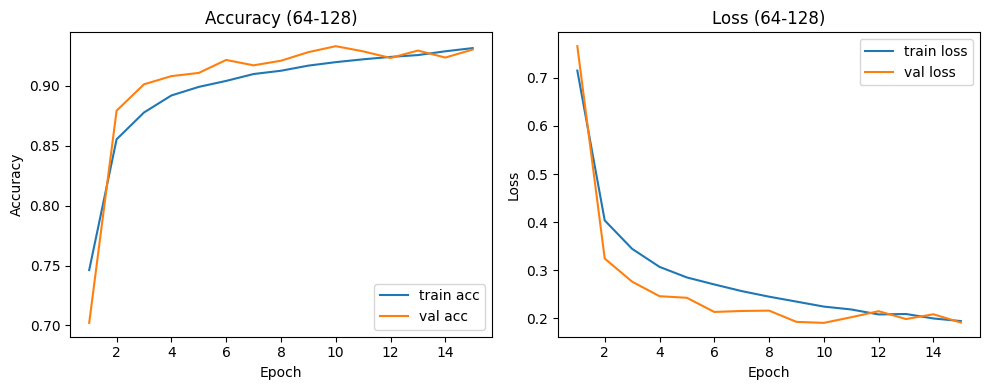

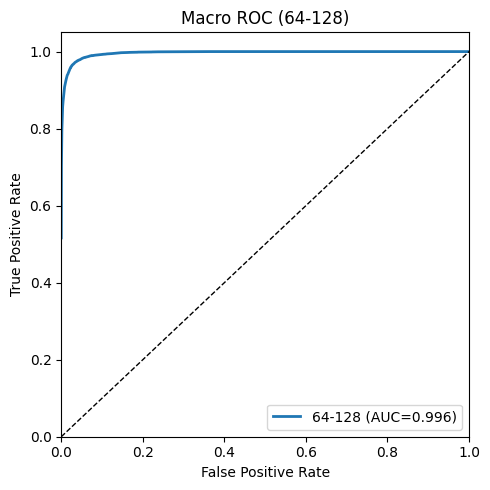


=== Training width config: 32-64 ===


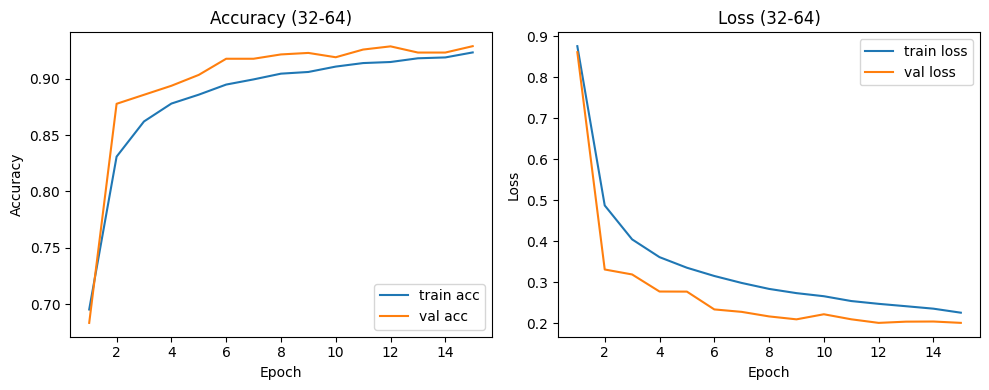

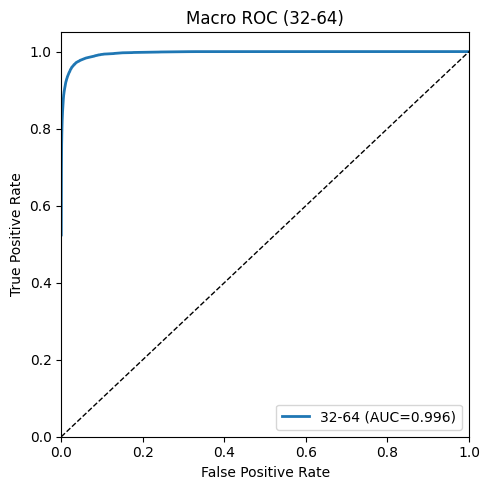


=== Training width config: 16-32 ===


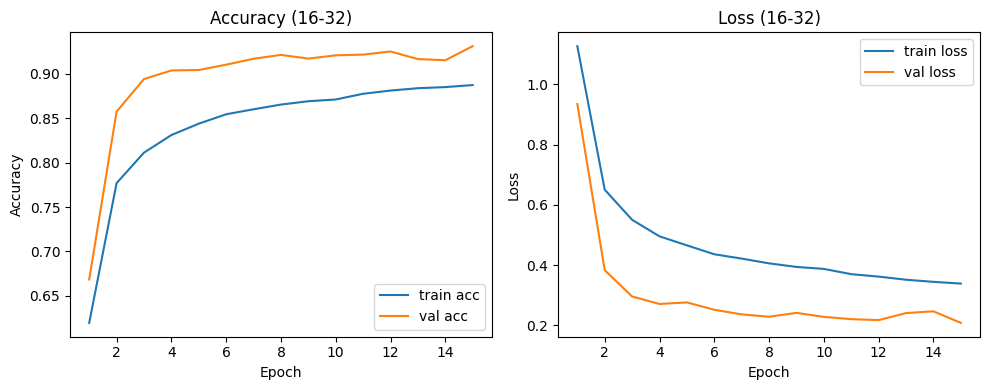

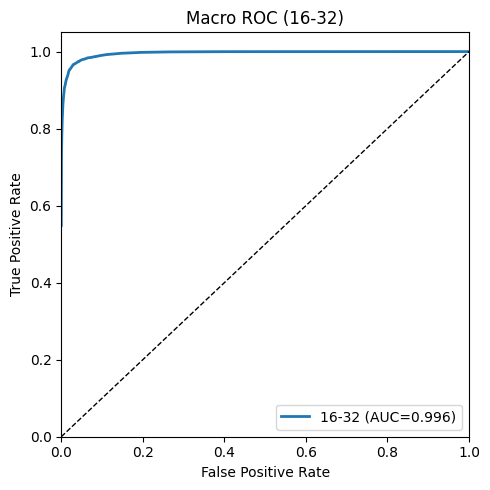

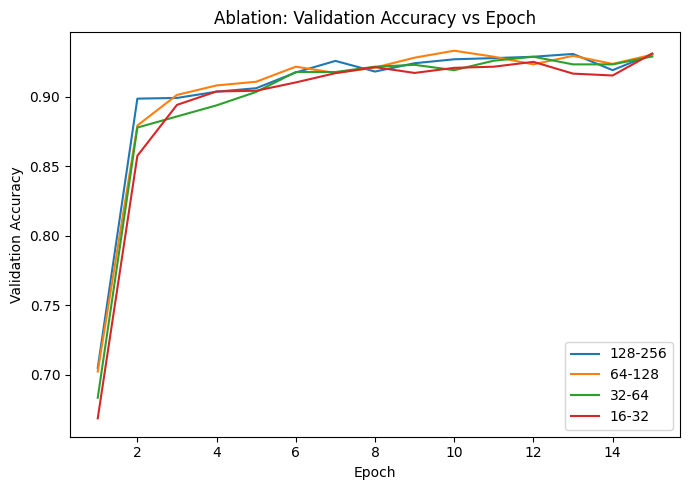

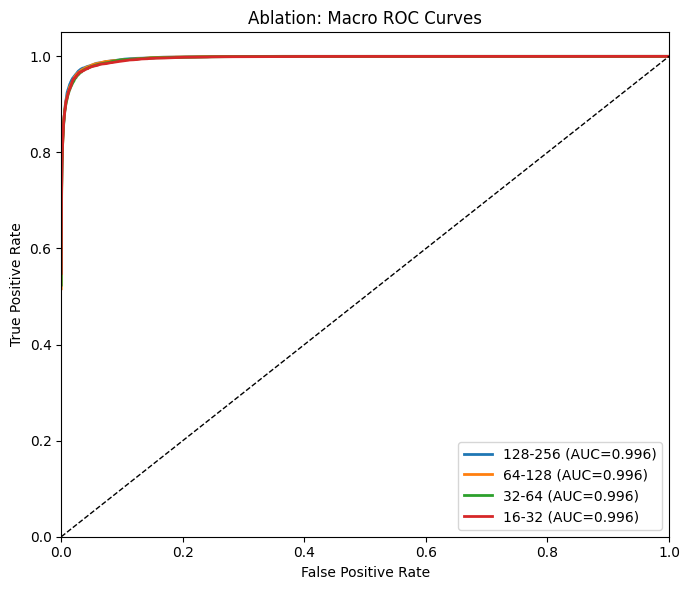

Saved to folder: ablation_runs/


In [ ]:
# Ablation on dense widths — save & jointly plot training and ROC curves

import os, json, numpy as np, matplotlib.pyplot as plt, tensorflow as tf
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from tensorflow.keras import layers, models

os.makedirs("ablation_runs", exist_ok=True)

# ------- Model builder (same convs, parametric dense widths) -------
def build_dcnn(input_shape=(28,28,1), dense1=128, dense2=256, dropout=0.3, n_classes=10):
    m = models.Sequential([
        tf.keras.Input(shape=input_shape),
        layers.Rescaling(1/255.0),

        layers.Conv2D(32, 3, padding='same'), layers.BatchNormalization(), layers.Activation('relu'),
        layers.Conv2D(32, 3, padding='same'), layers.BatchNormalization(), layers.Activation('relu'),
        layers.MaxPooling2D(2), layers.Dropout(dropout),

        layers.Conv2D(64, 3, padding='same'), layers.BatchNormalization(), layers.Activation('relu'),
        layers.Conv2D(64, 3, padding='same'), layers.BatchNormalization(), layers.Activation('relu'),
        layers.MaxPooling2D(2), layers.Dropout(dropout),

        layers.Conv2D(128, 3, padding='same'), layers.BatchNormalization(), layers.Activation('relu'),
        layers.Conv2D(128, 3, padding='same'), layers.BatchNormalization(), layers.Activation('relu'),
        layers.MaxPooling2D(2), layers.Dropout(dropout),

        layers.Flatten(),
        layers.Dense(dense1), layers.BatchNormalization(), layers.Activation('relu'), layers.Dropout(dropout),
        layers.Dense(dense2), layers.BatchNormalization(), layers.Activation('relu'), layers.Dropout(dropout),
        layers.Dense(n_classes, activation='softmax')
    ])
    m.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return m

# ------- Ablation widths: (128,256) → (64,128) → (32,64) → (16,32) -------
widths = [(128,256), (64,128), (32,64), (16,32)]

joint_histories = {}           # name -> history dict
joint_roc = []                 # list of (label, fpr_macro, tpr_macro, auc_macro)

# one-hot labels for ROC
n_classes = 10
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

for d1, d2 in widths:
    label = f"{d1}-{d2}"
    print(f"\n=== Training width config: {label} ===")
    model = build_dcnn(input_shape=x_train.shape[1:], dense1=d1, dense2=d2)

    ckpt_path = f"ablation_runs/best_{label}.keras"
    csv_path  = f"ablation_runs/history_{label}.csv"
    callbacks = [
        tf.keras.callbacks.ModelCheckpoint(ckpt_path, monitor="val_accuracy", save_best_only=True, verbose=0),
        tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5, restore_best_weights=True, verbose=0),
        tf.keras.callbacks.CSVLogger(csv_path)
    ]

    history = model.fit(
        x_train, y_train,
        validation_split=0.1,
        epochs=15, batch_size=128, verbose=0, callbacks=callbacks
    )

    # Save history json
    with open(f"ablation_runs/history_{label}.json", "w") as f:
        json.dump(history.history, f, indent=2)
    joint_histories[label] = history.history

    # ---- Save individual training curve (acc & loss) ----
    ep = range(1, len(history.history['accuracy'])+1)
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(ep, history.history['accuracy'], label='train acc')
    plt.plot(ep, history.history['val_accuracy'], label='val acc')
    plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title(f'Accuracy ({label})'); plt.legend()
    plt.subplot(1,2,2)
    plt.plot(ep, history.history['loss'], label='train loss')
    plt.plot(ep, history.history['val_loss'], label='val loss')
    plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title(f'Loss ({label})'); plt.legend()
    plt.tight_layout()
    plt.savefig(f"ablation_runs/train_curves_{label}.png", dpi=150)
    plt.show()

    # ---- ROC (macro-average) for this model; also save figure ----
    y_score = model.predict(x_test, verbose=0)     # (N, 10)
    # per-class ROC
    fpr, tpr = {}, {}
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    # macro-average
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    auc_macro = auc(all_fpr, mean_tpr)
    joint_roc.append((label, all_fpr, mean_tpr, auc_macro))

    # Save individual ROC plot
    plt.figure(figsize=(5,5))
    plt.plot(all_fpr, mean_tpr, label=f'{label} (AUC={auc_macro:.3f})', linewidth=2)
    plt.plot([0,1],[0,1],'k--', lw=1)
    plt.xlim([0,1]); plt.ylim([0,1.05])
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
    plt.title(f'Macro ROC ({label})'); plt.legend(loc='lower right')
    plt.tight_layout()
    plt.savefig(f"ablation_runs/roc_{label}.png", dpi=150)
    plt.show()

# ------- Joint plots across all configurations -------
# Joint validation accuracy curves
plt.figure(figsize=(7,5))
for label, hist in joint_histories.items():
    ep = range(1, len(hist['val_accuracy'])+1)
    plt.plot(ep, hist['val_accuracy'], label=label)
plt.xlabel('Epoch'); plt.ylabel('Validation Accuracy')
plt.title('Ablation: Validation Accuracy vs Epoch')
plt.legend()
plt.tight_layout()
plt.savefig("ablation_runs/joint_val_accuracy.png", dpi=150)
plt.show()

# Joint macro-ROC curves
plt.figure(figsize=(7,6))
for label, fpr_macro, tpr_macro, auc_macro in joint_roc:
    plt.plot(fpr_macro, tpr_macro, label=f'{label} (AUC={auc_macro:.3f})', linewidth=2)
plt.plot([0,1],[0,1],'k--', lw=1)
plt.xlim([0,1]); plt.ylim([0,1.05])
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.title('Ablation: Macro ROC Curves')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig("ablation_runs/joint_macro_roc.png", dpi=150)
plt.show()

print("Saved to folder: ablation_runs/")


# Fashion MNIST VAE

6. Ask Chat GPT to write the simple MLP AE for Fashion MNIST data. Visualzie the latent distribution and latent representations.

## Answer 6:

Model: "autoencoder_mlp"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ ae_input (InputLayer)           │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_mlp (Functional)        │ (None, 2)              │       533,762 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_mlp (Functional)        │ (None, 784)            │       534,544 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,068,306 (4.08 MB)

 Trainable params: 1,068,306 (4.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
211/211 - 5s - 24ms/step - loss: 0.0521 - val_loss: 0.0359
Epoch 2/20
211/211 - 2s - 10ms/step - loss: 0.0328 - val_loss: 0.0312
Epoch 3/20
211/211 - 1s - 4ms/step - loss: 0.0299 - val_loss: 0.0296
Epoch 4/20
211/211 - 1s - 4ms/step - loss: 0.0288 - val_loss: 0.0290
Epoch 5/20
211/211 - 1s - 4ms/step - loss: 0.0283 - val_loss: 0.0286
Epoch 6/20
211/211 - 1s - 4ms/step - loss: 0.0279 - val_loss: 0.0281
Epoch 7/20
211/211 - 1s - 4ms/step - loss: 0.0275 - val_loss: 0.0278
Epoch 8/20
211/211 - 1s - 4ms/step - loss: 0.0272 - val_loss: 0.0273
Epoch 9/20
211/211 - 1s - 4ms/step - loss: 0.0269 - val_loss: 0.0272
Epoch 10/20
211/211 - 1s - 4ms/step - loss: 0.0267 - val_loss: 0.0270
Epoch 11/20
211/211 - 1s - 4ms/step - loss: 0.0265 - val_loss: 0.0268
Epoch 12/20
211/211 - 1s - 5ms/step - loss: 0.0263 - val_loss: 0.0268
Epoch 13/20
211/211 - 1s - 5ms/step - loss: 0.0262 - val_loss: 0.0266
Epoch 14/20
211/211 - 1s - 4ms/step - loss: 0.0260 - val_loss: 0.0263
Epoch 15/20
211/211 - 1s - 

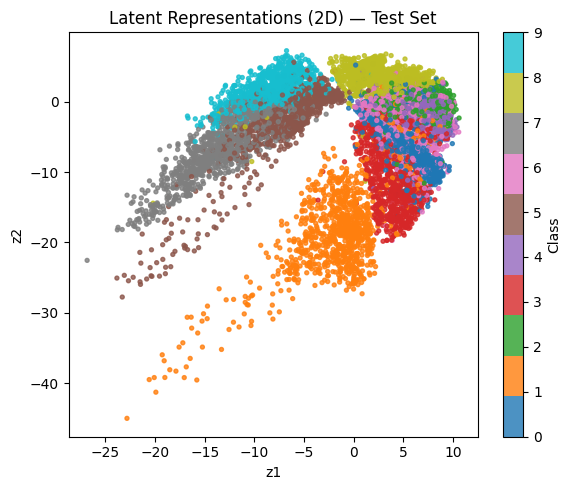

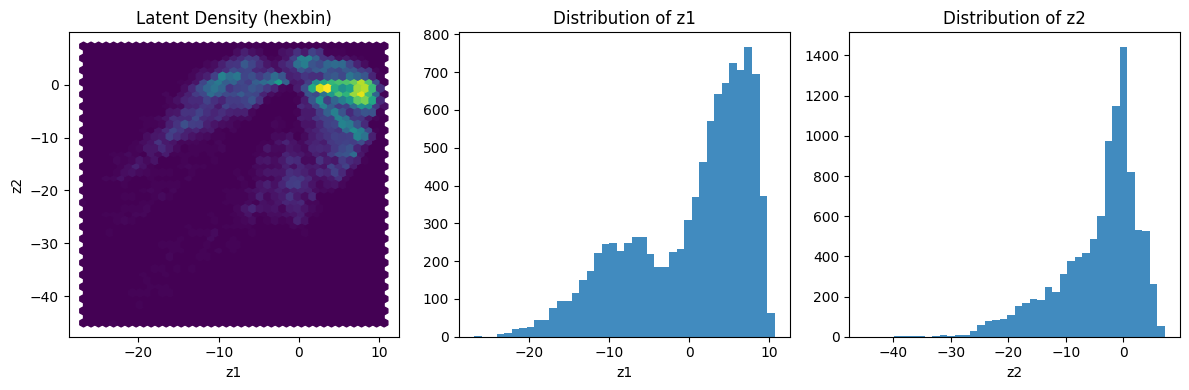

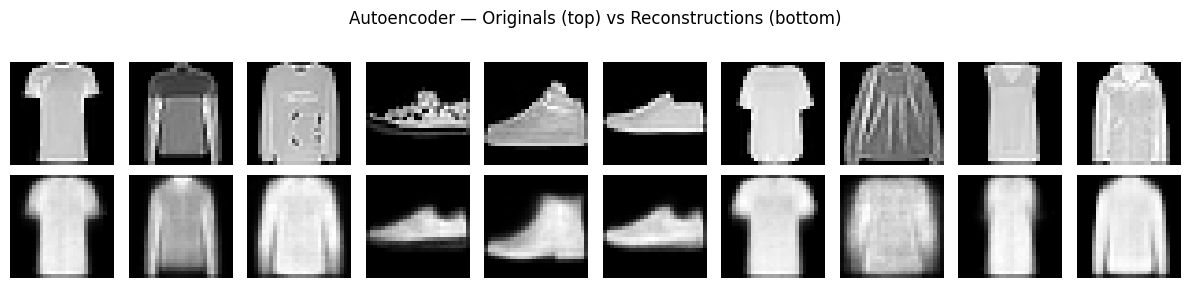

In [ ]:
# Simple MLP Autoencoder for Fashion-MNIST
# - 2D latent space (so we can visualize)
# - Visualize latent distribution + latent representations
# - Show reconstructions

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# Reuse your dataset if already loaded; otherwise uncomment:
# fashion_mnist = tf.keras.datasets.fashion_mnist
# (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

x_train = train_images.astype("float32") / 255.0
x_test  = test_images.astype("float32") / 255.0
y_train = train_labels
y_test  = test_labels

# Flatten for MLP AE
x_train_f = x_train.reshape((-1, 28*28))
x_test_f  = x_test.reshape((-1,  28*28))

latent_dim = 2  # keep 2D for easy visualization

# ----- Build MLP Autoencoder -----
inputs = layers.Input(shape=(28*28,), name="ae_input")
x = layers.Dense(512, activation="relu")(inputs)
x = layers.Dense(256, activation="relu")(x)
z = layers.Dense(latent_dim, name="z")(x)                # linear latent (common in AEs)

# Decoder
d = layers.Dense(256, activation="relu")(z)
d = layers.Dense(512, activation="relu")(d)
outputs = layers.Dense(28*28, activation="sigmoid")(d)   # sigmoid for [0,1] pixels

encoder = models.Model(inputs, z, name="encoder_mlp")
decoder_input = layers.Input(shape=(latent_dim,), name="z_input")
dd = decoder_input
dd = layers.Dense(256, activation="relu")(dd)
dd = layers.Dense(512, activation="relu")(dd)
dd = layers.Dense(28*28, activation="sigmoid")(dd)
decoder = models.Model(decoder_input, dd, name="decoder_mlp")

ae_outputs = decoder(encoder(inputs))
autoencoder = models.Model(inputs, ae_outputs, name="autoencoder_mlp")
autoencoder.compile(optimizer="adam", loss="mse")  # MSE works well for grayscale

autoencoder.summary()

history = autoencoder.fit(
    x_train_f, x_train_f,
    validation_split=0.1,
    epochs=20,
    batch_size=256,
    verbose=2
)

# ----- Latent codes for test set -----
z_test = encoder.predict(x_test_f, verbose=0)  # shape (N, 2)

# ----- Visualization: latent scatter colored by label -----
plt.figure(figsize=(6,5))
scatter = plt.scatter(z_test[:,0], z_test[:,1], c=y_test, s=8, cmap="tab10", alpha=0.8)
plt.colorbar(scatter, ticks=range(10), label="Class")
plt.title("Latent Representations (2D) — Test Set")
plt.xlabel("z1"); plt.ylabel("z2")
plt.tight_layout()
plt.show()

# ----- Latent distribution: 2D density (hexbin) + 1D histograms -----
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.hexbin(z_test[:,0], z_test[:,1], gridsize=40, cmap="viridis")
plt.title("Latent Density (hexbin)"); plt.xlabel("z1"); plt.ylabel("z2")
plt.subplot(1,3,2)
plt.hist(z_test[:,0], bins=40, alpha=0.85)
plt.title("Distribution of z1"); plt.xlabel("z1")
plt.subplot(1,3,3)
plt.hist(z_test[:,1], bins=40, alpha=0.85)
plt.title("Distribution of z2"); plt.xlabel("z2")
plt.tight_layout()
plt.show()

# ----- Reconstructions -----
n = 10
idx = np.random.choice(len(x_test_f), n, replace=False)
x_in = x_test_f[idx]
x_out = autoencoder.predict(x_in, verbose=0).reshape(-1,28,28)

plt.figure(figsize=(12,3))
for i in range(n):
    # original
    plt.subplot(2,n,i+1)
    plt.imshow(x_in[i].reshape(28,28), cmap="gray")
    plt.axis("off");
    if i == 0: plt.ylabel("Input")
    # reconstructed
    plt.subplot(2,n,n+i+1)
    plt.imshow(x_out[i], cmap="gray")
    plt.axis("off")
    if i == 0: plt.ylabel("Recon")
plt.suptitle("Autoencoder — Originals (top) vs Reconstructions (bottom)")
plt.tight_layout()
plt.show()

plt.savefig("latent_scatter.png", dpi=150); plt.close()
plt.savefig("latent_density.png", dpi=150); plt.close()
plt.savefig("reconstructions.png", dpi=150); plt.close()


7. Ask Chat GPT to write the DCNN VAE AE for Fashion MNIST data. Visualzie the latent distribution and latent representations. Modify the program to save the latent represnetation and latent distributions every 5 steps as images.

## Answer 7:

Model: "encoder_dcnn"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_19      │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_77 (Conv2D)  │ (None, 28, 28,    │        320 │ input_layer_19[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │        128 │ conv2d_77[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_101      │ (None, 28, 28,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_78 (Conv2D)  │ (None, 14, 14,    │     18,496 │ activation_101[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 14, 14,    │        256 │ conv2d_78[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_102      │ (None, 14, 14,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_79 (Conv2D)  │ (None, 7, 7, 128) │     73,856 │ activation_102[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 7, 7, 128) │        512 │ conv2d_79[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_103      │ (None, 7, 7, 128) │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_14          │ (None, 6272)      │          0 │ activation_103[0… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_68 (Dense)    │ (None, 256)       │  1,605,888 │ flatten_14[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 2)         │        514 │ dense_68[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 2)         │        514 │ dense_68[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sampling_3          │ (None, 2)         │          0 │ z_mean[0][0],     │
│ (Sampling)          │                   │            │ z_log_var[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,700,484 (6.49 MB)

 Trainable params: 1,700,036 (6.49 MB)

 Non-trainable params: 448 (1.75 KB)

Model: "decoder_dcnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_20 (InputLayer)     │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 3136)           │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_3 (Reshape)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_7              │ (None, 14, 14, 128)    │        73,856 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_104         │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_104 (Activation)     │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_8              │ (None, 28, 28, 64)     │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_105         │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_105 (Activation)     │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_9              │ (None, 28, 28, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_106         │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_106 (Activation)     │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_10             │ (None, 28, 28, 1)      │           289 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 176,705 (690.25 KB)

 Trainable params: 176,257 (688.50 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/25
422/422 - 28s - 66ms/step - kl_loss: 9.7755 - loss: 292.4599 - reconstruction_loss: 282.6843 - val_kl_loss: 5.3933 - val_loss: 520.6985 - val_reconstruction_loss: 515.3052
Epoch 2/25
422/422 - 26s - 61ms/step - kl_loss: 6.6541 - loss: 269.3908 - reconstruction_loss: 262.7367 - val_kl_loss: 6.9830 - val_loss: 272.9791 - val_reconstruction_loss: 265.9961
Epoch 3/25
422/422 - 8s - 19ms/step - kl_loss: 6.4639 - loss: 265.7572 - reconstruction_loss: 259.2932 - val_kl_loss: 6.8522 - val_loss: 277.3557 - val_reconstruction_loss: 270.5035
Epoch 4/25
422/422 - 8s - 19ms/step - kl_loss: 6.3256 - loss: 263.7627 - reconstruction_loss: 257.4370 - val_kl_loss: 6.4716 - val_loss: 265.9187 - val_reconstruction_loss: 259.4472
Epoch 5/25
422/422 - 11s - 25ms/step - kl_loss: 6.3168 - loss: 262.4405 - reconstruction_loss: 256.1237 - val_kl_loss: 6.3622 - val_loss: 265.1867 - val_reconstruction_loss: 258.8244
Epoch 6/25
422/422 - 9s - 22ms/step - kl_loss: 6.2507 - loss: 261.0164 - reconstruction

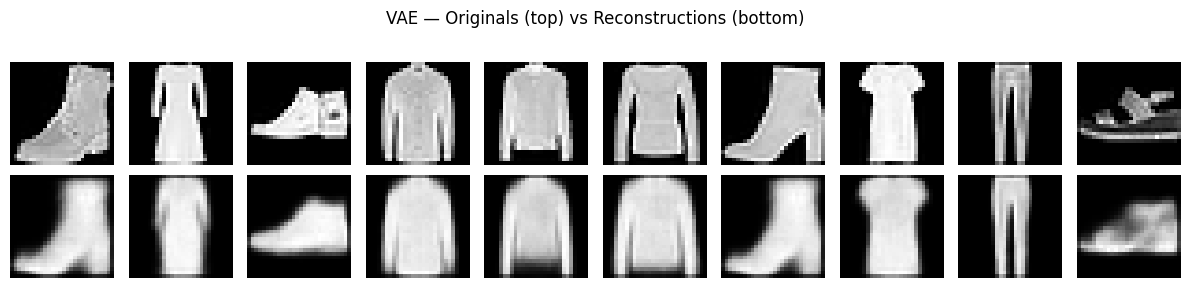

Saved latent plots to: vae_plots


In [ ]:
# ===== Question 7: DCNN VAE for Fashion-MNIST =====
# - Convolutional encoder/decoder (VAE)
# - Latent dim = 2 (so we can plot directly)
# - Visualize latent representations (scatter colored by class) + latent distribution (hexbin)
# - Save plots every 5 epochs as PNGs

import os, numpy as np, matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# --- Data (reuse if already loaded) ---
try:
    train_images
    test_images
    train_labels
    test_labels
except NameError:
    fashion_mnist = tf.keras.datasets.fashion_mnist
    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

x_train = (train_images.astype("float32") / 255.0)[..., np.newaxis]
x_test  = (test_images.astype("float32")  / 255.0)[..., np.newaxis]
y_test  = test_labels

# --- Hyperparams ---
latent_dim = 2
batch_size = 128
epochs = 25
plot_dir = "vae_plots"
os.makedirs(plot_dir, exist_ok=True)

# --- Sampling layer (reparameterization trick) ---
class Sampling(layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        eps = tf.random.normal(shape=tf.shape(z_mean))
        return z_mean + tf.exp(0.5 * z_log_var) * eps

# --- Encoder: Conv -> BN -> ReLU blocks, downsample with strides=2 ---
enc_inputs = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, strides=1, padding="same")(enc_inputs)
x = layers.BatchNormalization()(x); x = layers.Activation("relu")(x)
x = layers.Conv2D(64, 3, strides=2, padding="same")(x)     # 14x14
x = layers.BatchNormalization()(x); x = layers.Activation("relu")(x)
x = layers.Conv2D(128, 3, strides=2, padding="same")(x)    # 7x7
x = layers.BatchNormalization()(x); x = layers.Activation("relu")(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation="relu")(x)
z_mean    = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])

encoder = models.Model(enc_inputs, [z_mean, z_log_var, z], name="encoder_dcnn")
encoder.summary()

# --- Decoder: Dense -> Reshape -> Conv2DTranspose upsampling ---
dec_inputs = layers.Input(shape=(latent_dim,))
d = layers.Dense(7 * 7 * 64, activation="relu")(dec_inputs)
d = layers.Reshape((7, 7, 64))(d)
d = layers.Conv2DTranspose(128, 3, strides=2, padding="same")(d)  # 14x14
d = layers.BatchNormalization()(d); d = layers.Activation("relu")(d)
d = layers.Conv2DTranspose(64, 3, strides=2, padding="same")(d)   # 28x28
d = layers.BatchNormalization()(d); d = layers.Activation("relu")(d)
d = layers.Conv2DTranspose(32, 3, padding="same")(d)
d = layers.BatchNormalization()(d); d = layers.Activation("relu")(d)
dec_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(d)

decoder = models.Model(dec_inputs, dec_outputs, name="decoder_dcnn")
decoder.summary()

# --- VAE model with custom train_step (reconstruction + KL) ---
class VAE(tf.keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = tf.keras.metrics.Mean(name="loss")
        self.rec_loss_tracker   = tf.keras.metrics.Mean(name="reconstruction_loss")
        self.kl_loss_tracker    = tf.keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [self.total_loss_tracker, self.rec_loss_tracker, self.kl_loss_tracker]

    def train_step(self, data):
        if isinstance(data, tuple):  # (x, y) -> we ignore y
            data = data[0]
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data, training=True)
            # --- inside train_step ---
            recon = self.decoder(z, training=True)

            # Per-pixel BCE -> (batch, 28, 28); sum over H,W, then mean over batch
            rec_per_pixel = tf.keras.losses.binary_crossentropy(data, recon)
            rec_loss = tf.reduce_mean(tf.reduce_sum(rec_per_pixel, axis=(1, 2)))

            kl_loss = -0.5 * tf.reduce_mean(
                tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1)
            )

            total_loss = rec_loss + kl_loss


        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.rec_loss_tracker.update_state(rec_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {m.name: m.result() for m in self.metrics}

    def test_step(self, data):
        if isinstance(data, tuple):
            data = data[0]
        z_mean, z_log_var, z = self.encoder(data, training=False)
        # --- inside test_step ---
        recon = self.decoder(z, training=False)

        rec_per_pixel = tf.keras.losses.binary_crossentropy(data, recon)
        rec_loss = tf.reduce_mean(tf.reduce_sum(rec_per_pixel, axis=(1, 2)))

        kl_loss = -0.5 * tf.reduce_mean(
            tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1)
        )

        total_loss = rec_loss + kl_loss
        self.total_loss_tracker.update_state(total_loss)
        self.rec_loss_tracker.update_state(rec_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {m.name: m.result() for m in self.metrics}

vae = VAE(encoder, decoder)
vae.compile(optimizer=tf.keras.optimizers.Adam(1e-3))

# --- Plotting utility used by the callback ---
def save_latent_plots(epoch_idx, z_mu, labels, prefix="latent"):
    # Scatter colored by class
    plt.figure(figsize=(6,5))
    sc = plt.scatter(z_mu[:,0], z_mu[:,1], c=labels, s=8, cmap="tab10", alpha=0.85)
    cbar = plt.colorbar(sc, ticks=range(10)); cbar.set_label("Class")
    plt.title(f"Latent Representations — epoch {epoch_idx}")
    plt.xlabel("z1"); plt.ylabel("z2"); plt.tight_layout()
    path1 = os.path.join(plot_dir, f"{prefix}_scatter_epoch{epoch_idx:02d}.png")
    plt.savefig(path1, dpi=150); plt.close()

    # Hexbin density
    plt.figure(figsize=(5,5))
    plt.hexbin(z_mu[:,0], z_mu[:,1], gridsize=40, cmap="viridis")
    plt.title(f"Latent Density — epoch {epoch_idx}")
    plt.xlabel("z1"); plt.ylabel("z2"); plt.tight_layout()
    path2 = os.path.join(plot_dir, f"{prefix}_hexbin_epoch{epoch_idx:02d}.png")
    plt.savefig(path2, dpi=150); plt.close()

# --- Callback to save plots every 5 epochs ---
class LatentSaver(tf.keras.callbacks.Callback):
    def __init__(self, x_eval, y_eval):
        super().__init__()
        self.x_eval = x_eval
        self.y_eval = y_eval

    def on_epoch_end(self, epoch, logs=None):
        e = epoch + 1
        if e % 5 == 0:
            z_mean, _, _ = self.model.encoder(self.x_eval, training=False)
            save_latent_plots(e, z_mean.numpy(), self.y_eval, prefix="latent")

# Save at epochs 5,10,15,20,25
lat_cb = LatentSaver(x_test, y_test)

# --- Train (will emit PNGs every 5 epochs into vae_plots/) ---
hist = vae.fit(
    x_train, x_train,
    validation_split=0.1,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[lat_cb],
    verbose=2
)

# --- Final latent visualizations (after training completes) ---
z_mean_final, _, _ = encoder.predict(x_test, verbose=0)
save_latent_plots(epochs, z_mean_final, y_test, prefix="latent_final")

# --- Quick reconstructions preview (optional) ---
idx = np.random.choice(len(x_test), 10, replace=False)
_, _, z_sample = encoder(x_test[idx], training=False)
recon = decoder(z_sample).numpy()

plt.figure(figsize=(12,3))
for i in range(10):
    plt.subplot(2,10,i+1); plt.imshow(x_test[idx[i]].squeeze(), cmap="gray"); plt.axis("off")
    if i == 0: plt.ylabel("Input")
    plt.subplot(2,10,10+i+1); plt.imshow(recon[i].squeeze(), cmap="gray"); plt.axis("off")
    if i == 0: plt.ylabel("Recon")
plt.suptitle("VAE — Originals (top) vs Reconstructions (bottom)")
plt.tight_layout(); plt.show()

print(f"Saved latent plots to: {plot_dir}")


8. Can you upload the images and make a movie?

## Answer 8:

In [ ]:
# If needed: ensure ffmpeg is available for imageio
!pip -q install imageio imageio-ffmpeg

import imageio.v2 as imageio
import glob, os

img_dir = "vae_plots"
frames = sorted(glob.glob(os.path.join(img_dir, "latent_scatter_epoch*.png")))
assert frames, "No frames found. Make sure your callback saved images like latent_scatter_epoch05.png"

# Make GIF (very reliable in Colab)
gif_path = os.path.join(img_dir, "latent_evolution.gif")
imageio.mimsave(gif_path, [imageio.imread(f) for f in frames], duration=1.0)  # 1 sec per frame

# Make MP4 with ffmpeg backend
mp4_path = os.path.join(img_dir, "latent_evolution.mp4")
writer = imageio.get_writer(mp4_path, fps=2)  # 2 frames/sec
for f in frames:
    writer.append_data(imageio.imread(f))
writer.close()

print("Created:", gif_path, "and", mp4_path)


Created: vae_plots/latent_evolution.gif and vae_plots/latent_evolution.mp4


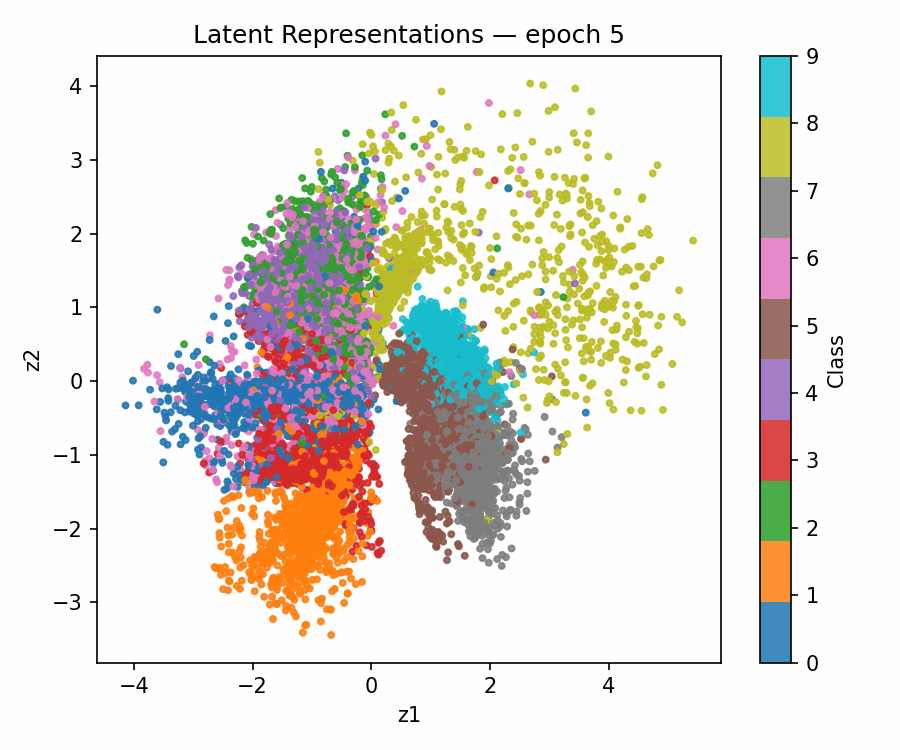

In [ ]:
# Click on run button of this cell to play the GIF
# In the downward cell, there is mp4 as well otherwise.
from IPython.display import Image, display
display(Image(filename="vae_plots/latent_evolution.gif"))


In [ ]:
from IPython.display import Video, display
display(Video("vae_plots/latent_evolution.mp4", embed=True))


9. Write the defintions for:
- Latent istribution
- Latent represnetation
- Disentangling of represnetations
- Conditional VAE

## Answer 9:

**Latent Distribution**

The latent distribution refers to the statistical distribution of the hidden variables learned by an autoencoder or VAE.
It describes how the model encodes the input data into a lower-dimensional latent space — typically assumed to follow a simple prior such as a multivariate normal distribution $( \mathcal{N}(0, I) )$.
During training, a VAE regularizes its encoder so that the encoded latent variables approximate this prior, ensuring smooth sampling and meaningful interpolation between data points.

**Latent Representation**

A latent representation is the compressed and encoded form of the input data produced by the encoder network.
It captures the essential features and abstract factors of variation in the data (e.g., shape, texture, style) in a compact, continuous space.
These representations allow similar inputs to cluster together in latent space and can be decoded back into realistic reconstructions by the decoder.


**Disentangling of Representations**

Disentangling refers to the process of learning latent variables that correspond to independent, interpretable factors of variation in the data.
In a well-disentangled representation, each latent dimension controls one meaningful attribute (e.g., rotation, color, or thickness), and changing one factor does not affect others.
Disentangled representations are desirable because they improve interpretability, transferability, and control in generative models.

**Conditional VAE (CVAE)**

A Conditional Variational Autoencoder (CVAE) is an extension of the VAE that models $( p(x|y, z) )$, where $( y )$ is a known condition or label (e.g., digit class in MNIST).
Both the encoder and decoder are conditioned on ( y ), allowing the model to generate or reconstruct data consistent with a specific label.
This makes CVAEs powerful for controlled generation, such as producing images of a particular class or style while maintaining variability in other attributes.

10. Explore if the ChatGPT can write a code for the VAE with rotational invariance

## Answer 10:

Here’s a **Colab-ready rotation-invariant VAE**.
It makes the latent **invariant to image rotations** by using a **discrete rotation group** (0°, 90°, 180°, 270°):

* The **encoder** is applied to **all rotated copies** of the input; we **average** their ( \mu ) and ( \log\sigma^2 ) → invariant (z).
* The **decoder** produces a **canonical** reconstruction. For the loss, we rotate the decoded image by all group angles and take the **minimum reconstruction loss** vs. the original input (so the model isn’t penalized for rotational ambiguity).
* This gives practical rotational invariance without special ops (only `tf.image.rot90`).

> Angles can be increased (e.g., 8 angles every 45°) for tighter invariance at higher compute cost.

Epoch 1/15
422/422 - 41s - 98ms/step - kl_loss: 6.5168 - loss: 281.8826 - reconstruction_loss: 275.3659 - val_kl_loss: 6.0542 - val_loss: 885.3915 - val_reconstruction_loss: 879.3373
Epoch 2/15
422/422 - 13s - 32ms/step - kl_loss: 5.8132 - loss: 266.0736 - reconstruction_loss: 260.2605 - val_kl_loss: 5.8157 - val_loss: 271.3871 - val_reconstruction_loss: 265.5714
Epoch 3/15
422/422 - 13s - 32ms/step - kl_loss: 5.8419 - loss: 263.1287 - reconstruction_loss: 257.2868 - val_kl_loss: 6.0256 - val_loss: 275.2496 - val_reconstruction_loss: 269.2240
Epoch 4/15
422/422 - 14s - 33ms/step - kl_loss: 5.8913 - loss: 261.9073 - reconstruction_loss: 256.0160 - val_kl_loss: 6.0610 - val_loss: 265.8564 - val_reconstruction_loss: 259.7953
Epoch 5/15
422/422 - 14s - 33ms/step - kl_loss: 5.9254 - loss: 260.9536 - reconstruction_loss: 255.0281 - val_kl_loss: 5.9936 - val_loss: 271.2839 - val_reconstruction_loss: 265.2903
Epoch 6/15
422/422 - 14s - 33ms/step - kl_loss: 5.9507 - loss: 260.1495 - reconstruct

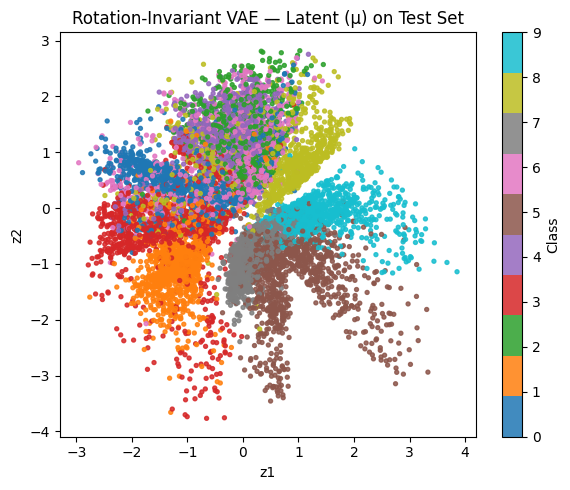

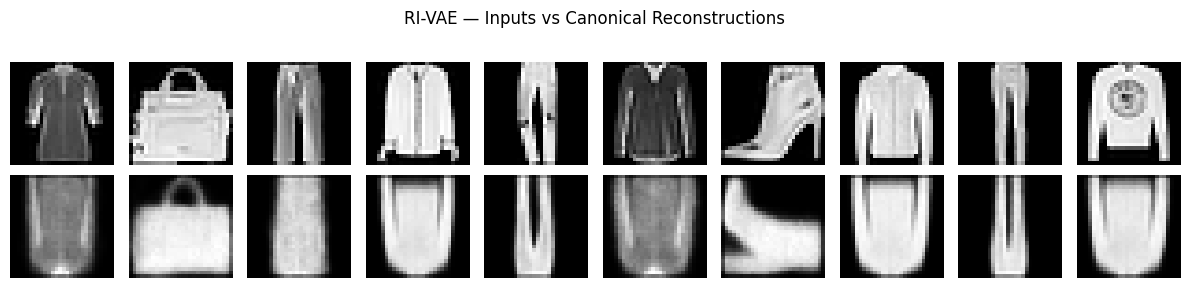

In [ ]:
# Rotation-Invariant DCNN VAE (discrete SO(2) via {0,90,180,270})
import numpy as np, tensorflow as tf, matplotlib.pyplot as plt
from tensorflow.keras import layers, models

# --- Data ---
try:
    train_images
    test_images
    train_labels
    test_labels
except NameError:
    (train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

x_train = (train_images.astype("float32")/255.0)[..., None]
x_test  = (test_images.astype("float32")/255.0)[..., None]
y_test  = test_labels
input_shape = (28,28,1)
latent_dim = 2
angles_k = [0,1,2,3]  # k steps of 90°: 0°,90°,180°,270°

# --- Small DCNN encoder/decoder ---
def make_encoder():
    inp = layers.Input(shape=input_shape)
    x = layers.Conv2D(32,3,padding="same")(inp); x = layers.BatchNormalization()(x); x = layers.Activation("relu")(x)
    x = layers.Conv2D(64,3,strides=2,padding="same")(x); x = layers.BatchNormalization()(x); x = layers.Activation("relu")(x) # 14x14
    x = layers.Conv2D(128,3,strides=2,padding="same")(x); x = layers.BatchNormalization()(x); x = layers.Activation("relu")(x) # 7x7
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation="relu")(x)
    z_mu = layers.Dense(latent_dim, name="z_mu")(x)
    z_logv = layers.Dense(latent_dim, name="z_logv")(x)
    return models.Model(inp, [z_mu, z_logv], name="encoder_ri")

def make_decoder():
    inp = layers.Input(shape=(latent_dim,))
    x = layers.Dense(7*7*64, activation="relu")(inp)
    x = layers.Reshape((7,7,64))(x)
    x = layers.Conv2DTranspose(128,3,strides=2,padding="same")(x); x = layers.BatchNormalization()(x); x = layers.Activation("relu")(x) # 14x14
    x = layers.Conv2DTranspose(64,3,strides=2,padding="same")(x);  x = layers.BatchNormalization()(x); x = layers.Activation("relu")(x) # 28x28
    x = layers.Conv2DTranspose(32,3,padding="same")(x);             x = layers.BatchNormalization()(x); x = layers.Activation("relu")(x)
    out = layers.Conv2DTranspose(1,3,activation="sigmoid",padding="same")(x)
    return models.Model(inp, out, name="decoder_ri")

encoder, decoder = make_encoder(), make_decoder()

# --- Reparameterization ---
class Sampling(layers.Layer):
    def call(self, inputs):
        mu, logv = inputs
        eps = tf.random.normal(tf.shape(mu))
        return mu + tf.exp(0.5*logv) * eps

sampler = Sampling()

# --- Rotation helpers ---
def rotate_k(x, k):            # k ∈ {0,1,2,3} -> 0°,90°,180°,270°
    return tf.image.rot90(x, k=k)

# --- Rotation-Invariant VAE model ---
class RIVAE(tf.keras.Model):
    def __init__(self, enc, dec, rotations):
        super().__init__()
        self.enc, self.dec = enc, dec
        self.rotations = rotations
        self.total_loss_tracker = tf.keras.metrics.Mean(name="loss")
        self.rec_loss_tracker   = tf.keras.metrics.Mean(name="reconstruction_loss")
        self.kl_loss_tracker    = tf.keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [self.total_loss_tracker, self.rec_loss_tracker, self.kl_loss_tracker]

    def encode_invariant(self, x, training):
        # encode all rotated inputs with shared encoder, then average mu/logv (group average)
        mus, logvs = [], []
        for k in self.rotations:
            xr = rotate_k(x, k)
            mu, logv = self.enc(xr, training=training)
            mus.append(mu); logvs.append(logv)
        mu  = tf.reduce_mean(tf.stack(mus, axis=0), axis=0)
        logv= tf.reduce_mean(tf.stack(logvs, axis=0), axis=0)
        z = sampler([mu, logv])
        return mu, logv, z

    def reconstruction_loss_min_over_rot(self, x, x_hat):
        # Compare original x to every rotated version of the canonical reconstruction x_hat
        per_rot_losses = []
        for k in self.rotations:
            xh = rotate_k(x_hat, k)
            # BCE returns (batch, 28, 28); sum over H,W then keep per-sample loss
            px = tf.keras.losses.binary_crossentropy(x, xh)
            per_rot_losses.append(tf.reduce_sum(px, axis=(1,2)))
        # Stack -> (num_rot, batch); pick best rotation per sample
        per_rot_losses = tf.stack(per_rot_losses, axis=0)
        best_per_sample = tf.reduce_min(per_rot_losses, axis=0)
        return tf.reduce_mean(best_per_sample)

    def train_step(self, data):
        x = data[0] if isinstance(data, tuple) else data
        with tf.GradientTape() as tape:
            mu, logv, z = self.encode_invariant(x, training=True)
            x_hat = self.dec(z, training=True)  # canonical
            rec = self.reconstruction_loss_min_over_rot(x, x_hat)
            kl  = -0.5 * tf.reduce_mean(tf.reduce_sum(1 + logv - tf.square(mu) - tf.exp(logv), axis=1))
            loss = rec + kl
        grads = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(loss)
        self.rec_loss_tracker.update_state(rec)
        self.kl_loss_tracker.update_state(kl)
        return {m.name: m.result() for m in self.metrics}

    def test_step(self, data):
        x = data[0] if isinstance(data, tuple) else data
        mu, logv, z = self.encode_invariant(x, training=False)
        x_hat = self.dec(z, training=False)
        rec = self.reconstruction_loss_min_over_rot(x, x_hat)
        kl  = -0.5 * tf.reduce_mean(tf.reduce_sum(1 + logv - tf.square(mu) - tf.exp(logv), axis=1))
        loss = rec + kl
        self.total_loss_tracker.update_state(loss)
        self.rec_loss_tracker.update_state(rec)
        self.kl_loss_tracker.update_state(kl)
        return {m.name: m.result() for m in self.metrics}

ri_vae = RIVAE(encoder, decoder, rotations=angles_k)
ri_vae.compile(optimizer=tf.keras.optimizers.Adam(1e-3))

# --- Train ---
hist = ri_vae.fit(
    x_train, x_train,
    validation_split=0.1,
    epochs=15, batch_size=128, verbose=2
)

# --- Latent visualization (invariant z from the original orientation) ---
mu_test, _, _ = ri_vae.encode_invariant(x_test, training=False)
z_test = mu_test.numpy()

plt.figure(figsize=(6,5))
sc = plt.scatter(z_test[:,0], z_test[:,1], c=y_test, s=8, cmap="tab10", alpha=0.85)
plt.colorbar(sc, ticks=range(10), label="Class")
plt.title("Rotation-Invariant VAE — Latent (μ) on Test Set")
plt.xlabel("z1"); plt.ylabel("z2"); plt.tight_layout(); plt.show()

# --- Quick reconstructions (note: canonical orientation) ---
idx = np.random.choice(len(x_test), 10, replace=False)
_, _, z = ri_vae.encode_invariant(x_test[idx], training=False)
x_hat = decoder(z).numpy()

plt.figure(figsize=(12,3))
for i in range(10):
    plt.subplot(2,10,i+1);     plt.imshow(x_test[idx[i]].squeeze(), cmap="gray"); plt.axis("off")
    if i == 0: plt.ylabel("Input")
    plt.subplot(2,10,10+i+1);  plt.imshow(x_hat[i].squeeze(), cmap="gray");      plt.axis("off")
    if i == 0: plt.ylabel("Recon (canonical)")
plt.suptitle("RI-VAE — Inputs vs Canonical Reconstructions")
plt.tight_layout(); plt.show()


What this gives you

* A **VAE that’s invariant to 0/90/180/270° rotations**: the latent (z) is the same regardless of those rotations.
* **Canonical reconstructions** (the decoder chooses an orientation; the loss is rotation-minimized).
* A **2-D latent scatter** you can compare to your earlier AE/VAE plots.

11. Ask ChatGPT to write a class-conditioned VAE and plot the latent represnetations.

## Answer 11:

Model: "cvae_encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ label_in            │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_72 (Dense)    │ (None, 784)       │      8,624 │ label_in[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ img_in (InputLayer) │ (None, 28, 28, 1) │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_5 (Reshape) │ (None, 28, 28, 1) │          0 │ dense_72[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 28, 28, 2) │          0 │ img_in[0][0],     │
│ (Concatenate)       │                   │            │ reshape_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_83 (Conv2D)  │ (None, 28, 28,    │        608 │ concatenate[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │        128 │ conv2d_83[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_113      │ (None, 28, 28,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_84 (Conv2D)  │ (None, 14, 14,    │     18,496 │ activation_113[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 14, 14,    │        256 │ conv2d_84[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_114      │ (None, 14, 14,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_85 (Conv2D)  │ (None, 7, 7, 128) │     73,856 │ activation_114[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 7, 7, 128) │        512 │ conv2d_85[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_115      │ (None, 7, 7, 128) │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_16          │ (None, 6272)      │          0 │ activation_115[0… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_73 (Dense)    │ (None, 256)       │  1,605,888 │ flatten_16[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 2)         │        514 │ dense_73[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 2)         │        514 │ dense_73[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sampling_5          │ (None, 2)         │          0 │ z_mean[0][0],     │
│ (Sampling)          │                   │            │ z_log_var[0][0] 

 Total params: 1,709,396 (6.52 MB)

 Trainable params: 1,708,948 (6.52 MB)

 Non-trainable params: 448 (1.75 KB)

Model: "cvae_decoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ z_in (InputLayer)   │ (None, 2)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ label_in2           │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 12)        │          0 │ z_in[0][0],       │
│ (Concatenate)       │                   │            │ label_in2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_74 (Dense)    │ (None, 3136)      │     40,768 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_6 (Reshape) │ (None, 7, 7, 64)  │          0 │ dense_74[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_15 │ (None, 14, 14,    │     73,856 │ reshape_6[0][0]   │
│ (Conv2DTranspose)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 14, 14,    │        512 │ conv2d_transpose… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_116      │ (None, 14, 14,    │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_16 │ (None, 28, 28,    │     73,792 │ activation_116[0… │
│ (Conv2DTranspose)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │        256 │ conv2d_transpose… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_117      │ (None, 28, 28,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_17 │ (None, 28, 28,    │     18,464 │ activation_117[0… │
│ (Conv2DTranspose)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │        128 │ conv2d_transpose… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_118      │ (None, 28, 28,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_18 │ (None, 28, 28, 1) │        289 │ activation_118[0… │
│ (Conv2DTranspose)   │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 208,065 (812.75 KB)

 Trainable params: 207,617 (811.00 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/20
422/422 - 29s - 68ms/step - kl_loss: 1229.6351 - loss: 1499.2117 - reconstruction_loss: 269.5770 - val_kl_loss: 2.6667 - val_loss: 540.5508 - val_reconstruction_loss: 537.8842
Epoch 2/20
422/422 - 8s - 19ms/step - kl_loss: 5.3435 - loss: 258.8886 - reconstruction_loss: 253.5450 - val_kl_loss: 5.1844 - val_loss: 263.9197 - val_reconstruction_loss: 258.7353
Epoch 3/20
422/422 - 8s - 20ms/step - kl_loss: 5.2285 - loss: 256.9177 - reconstruction_loss: 251.6892 - val_kl_loss: 5.0880 - val_loss: 258.6840 - val_reconstruction_loss: 253.5959
Epoch 4/20
422/422 - 8s - 19ms/step - kl_loss: 5.1976 - loss: 255.9681 - reconstruction_loss: 250.7705 - val_kl_loss: 5.0691 - val_loss: 259.6179 - val_reconstruction_loss: 254.5488
Epoch 5/20
422/422 - 8s - 20ms/step - kl_loss: 5.2178 - loss: 255.4362 - reconstruction_loss: 250.2181 - val_kl_loss: 5.1044 - val_loss: 259.8803 - val_reconstruction_loss: 254.7759
Epoch 6/20
422/422 - 8s - 20ms/step - kl_loss: 5.1234 - loss: 254.5800 - reconstructi

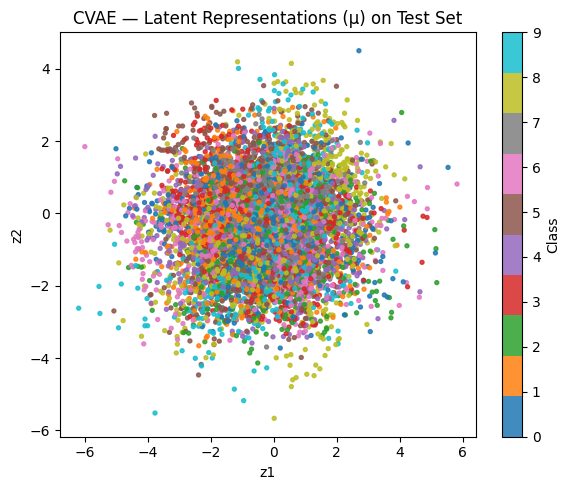

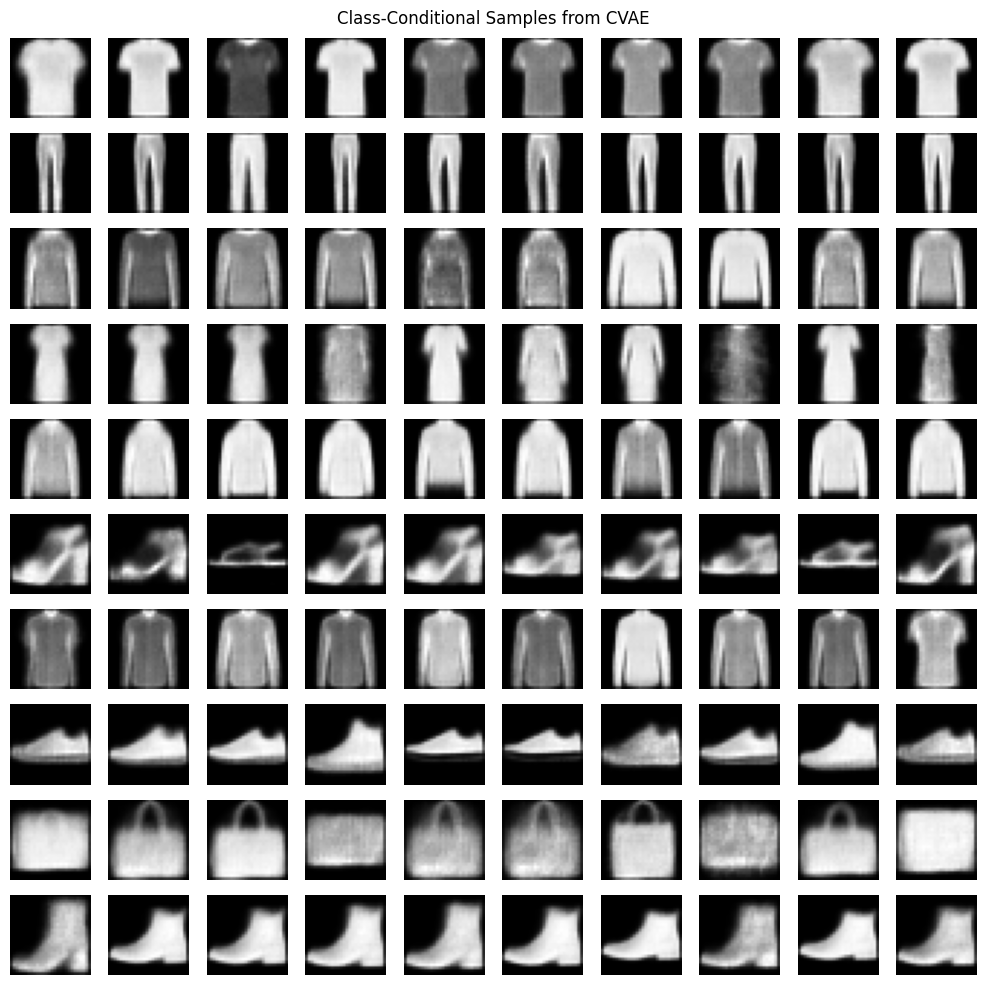

In [ ]:
# Question 11: Class-Conditioned VAE (CVAE) + latent visualization

import numpy as np, matplotlib.pyplot as plt, tensorflow as tf
from tensorflow.keras import layers, models

# --- Data (reuse if already loaded) ---
# (train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

x_train = (train_images.astype("float32")/255.0)[..., None]  # (N,28,28,1)
x_test  = (test_images.astype("float32")/255.0)[..., None]
y_train = train_labels.astype("int32")
y_test  = test_labels.astype("int32")
num_classes = 10
y_train_oh = tf.one_hot(y_train, num_classes)
y_test_oh  = tf.one_hot(y_test,  num_classes)

latent_dim = 2
batch_size = 128
epochs = 20

# ---------- Conditional Encoder ----------
# Inputs: image and label one-hot
img_in = layers.Input(shape=(28,28,1), name="img_in")
lbl_in = layers.Input(shape=(num_classes,), name="label_in")

# Map label to a spatial mask and concatenate with image (simple conditioning)
lbl_map = layers.Dense(28*28, activation=None)(lbl_in)
lbl_map = layers.Reshape((28,28,1))(lbl_map)
x = layers.Concatenate(axis=-1)([img_in, lbl_map])  # (28,28,2)

x = layers.Conv2D(32, 3, padding="same")(x); x = layers.BatchNormalization()(x); x = layers.Activation("relu")(x)
x = layers.Conv2D(64, 3, strides=2, padding="same")(x); x = layers.BatchNormalization()(x); x = layers.Activation("relu")(x)  # 14x14
x = layers.Conv2D(128,3, strides=2, padding="same")(x); x = layers.BatchNormalization()(x); x = layers.Activation("relu")(x)  # 7x7
x = layers.Flatten()(x)
x = layers.Dense(256, activation="relu")(x)

z_mean    = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)

class Sampling(layers.Layer):
    def call(self, inputs):
        mu, logv = inputs
        eps = tf.random.normal(tf.shape(mu))
        return mu + tf.exp(0.5*logv)*eps

z = Sampling()([z_mean, z_log_var])

encoder = models.Model([img_in, lbl_in], [z_mean, z_log_var, z], name="cvae_encoder")
encoder.summary()

# ---------- Conditional Decoder ----------
# Inputs: latent and label one-hot (concatenate then deconv)
z_in   = layers.Input(shape=(latent_dim,), name="z_in")
lbl_in2= layers.Input(shape=(num_classes,), name="label_in2")
zd = layers.Concatenate(axis=-1)([z_in, lbl_in2])

d = layers.Dense(7*7*64, activation="relu")(zd)
d = layers.Reshape((7,7,64))(d)
d = layers.Conv2DTranspose(128,3,strides=2,padding="same")(d); d = layers.BatchNormalization()(d); d = layers.Activation("relu")(d) # 14x14
d = layers.Conv2DTranspose(64, 3,strides=2,padding="same")(d); d = layers.BatchNormalization()(d); d = layers.Activation("relu")(d) # 28x28
d = layers.Conv2DTranspose(32, 3,padding="same")(d);          d = layers.BatchNormalization()(d); d = layers.Activation("relu")(d)
img_out = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(d)

decoder = models.Model([z_in, lbl_in2], img_out, name="cvae_decoder")
decoder.summary()

# ---------- CVAE wrapper with custom train/test step ----------
class CVAE(tf.keras.Model):
    def __init__(self, enc, dec):
        super().__init__()
        self.enc, self.dec = enc, dec
        self.total_loss_tracker = tf.keras.metrics.Mean(name="loss")
        self.rec_loss_tracker   = tf.keras.metrics.Mean(name="reconstruction_loss")
        self.kl_loss_tracker    = tf.keras.metrics.Mean(name="kl_loss")
    @property
    def metrics(self):  # for Keras to reset states
        return [self.total_loss_tracker, self.rec_loss_tracker, self.kl_loss_tracker]

    def train_step(self, data):
        # data = ([img, onehot_label], target_img)
        (img, lbl), target = data
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.enc([img, lbl], training=True)
            recon = self.dec([z, lbl], training=True)
            # BCE per pixel -> (B,28,28); sum over H,W and mean over batch
            rec_loss = tf.reduce_mean(tf.reduce_sum(tf.keras.losses.binary_crossentropy(target, recon), axis=(1,2)))
            kl_loss  = -0.5 * tf.reduce_mean(tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1))
            loss = rec_loss + kl_loss
        grads = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(loss)
        self.rec_loss_tracker.update_state(rec_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {m.name: m.result() for m in self.metrics}

    def test_step(self, data):
        (img, lbl), target = data
        z_mean, z_log_var, z = self.enc([img, lbl], training=False)
        recon = self.dec([z, lbl], training=False)
        rec_loss = tf.reduce_mean(tf.reduce_sum(tf.keras.losses.binary_crossentropy(target, recon), axis=(1,2)))
        kl_loss  = -0.5 * tf.reduce_mean(tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1))
        loss = rec_loss + kl_loss
        self.total_loss_tracker.update_state(loss)
        self.rec_loss_tracker.update_state(rec_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {m.name: m.result() for m in self.metrics}

cvae = CVAE(encoder, decoder)
cvae.compile(optimizer=tf.keras.optimizers.Adam(1e-3))

# ---------- Train ----------
hist = cvae.fit(
    x=[x_train, y_train_oh],
    y=x_train,
    validation_split=0.1,
    epochs=epochs,
    batch_size=batch_size,
    verbose=2
)

# ---------- Latent representations on test set ----------
z_mu_test, _, _ = encoder.predict([x_test, y_test_oh], verbose=0)  # (N,2)

plt.figure(figsize=(6,5))
sc = plt.scatter(z_mu_test[:,0], z_mu_test[:,1], c=y_test, s=8, cmap="tab10", alpha=0.85)
plt.colorbar(sc, ticks=range(num_classes), label="Class")
plt.title("CVAE — Latent Representations (μ) on Test Set")
plt.xlabel("z1"); plt.ylabel("z2")
plt.tight_layout(); plt.show()

# ---------- Optional: class-conditional generation ----------
# Sample z ~ N(0,I), concatenate one-hot class, decode
def sample_class(c, n=10, s=1.0):
    z = np.random.normal(0, s, size=(n, latent_dim)).astype("float32")
    y = tf.one_hot([c]*n, num_classes)
    gen = decoder.predict([z, y], verbose=0)
    return gen[...,0]

classes_to_show = [0,1,2,3,4,5,6,7,8,9]
fig, axes = plt.subplots(len(classes_to_show), 10, figsize=(10, len(classes_to_show)))
for r, c in enumerate(classes_to_show):
    imgs = sample_class(c, n=10, s=1.0)
    for i in range(10):
        axes[r,i].imshow(imgs[i], cmap="gray"); axes[r,i].axis("off")
        if i==0: axes[r,i].set_ylabel(str(c), rotation=0, labelpad=12, fontsize=9)
plt.suptitle("Class-Conditional Samples from CVAE")
plt.tight_layout(); plt.show()


12. Can you identify the meaning of the latent variables?

## Answer 12:

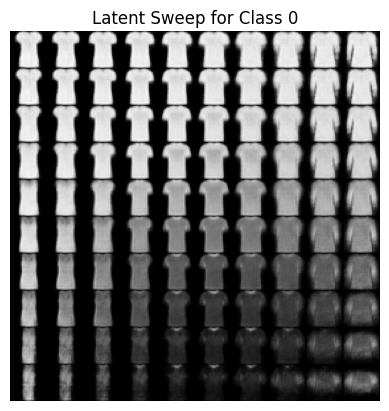

In [ ]:
# Sweep z1, z2 while keeping label fixed
import numpy as np, matplotlib.pyplot as plt

def latent_sweep(class_id=0, grid_size=10, span=3):
    grid_x = np.linspace(-span, span, grid_size)
    grid_y = np.linspace(-span, span, grid_size)
    imgs = []
    for yi in grid_y:
        row = []
        for xi in grid_x:
            z = np.array([[xi, yi]], dtype="float32")
            y = tf.one_hot([class_id], 10)
            row.append(decoder.predict([z, y], verbose=0)[0,...,0])
        imgs.append(np.concatenate(row, axis=1))
    imgs = np.concatenate(imgs, axis=0)
    plt.imshow(imgs, cmap="gray"); plt.axis("off")
    plt.title(f"Latent Sweep for Class {class_id}")
    plt.show()

latent_sweep(0)  # try different class ids


### Interpretation:

The latent sweep for Class 0 (T-shirt/top) shows how variations in the 2-D latent space control specific visual attributes of the generated images.

- Moving horizontally (along $z_{1}$) gradually changes the shape and sleeve length of the T-shirt — from shorter and tighter forms on the left to longer and looser forms on the right.

- Moving vertically (along $z_{2}$) primarily alters the brightness and shading, indicating changes in texture.

Thus, the two latent variables capture independent and interpretable factors, demonstrating that the VAE learned a meaningful, continuous latent representation of clothing variations.

13. Explore with ChatGPT how VAEs are used for (one of):
- Image analysis
- Deep fakes
- Natural Language Programming
- Drug discovery
- Property optimization

## Answer 13:

Given your expertise in **mechanics of materials, adhesion, and computational modeling**, the most natural choice is:

---

## **VAEs for Property Optimization**

---

Variational Autoencoders (VAEs) are increasingly applied in **property optimization** to design materials or structures with targeted performance characteristics.
A VAE learns to encode complex input data—such as microstructures, molecular configurations, or geometric designs—into a low-dimensional **latent space** that captures the essential features influencing physical properties.
Once trained, researchers can explore this latent space to **generate new designs** and identify configurations with **optimal mechanical, thermal, or transport properties**.
For example, VAEs can be used to generate microstructures that maximize stiffness or minimize permeability, enabling data-driven material discovery.
This approach parallels computational mechanics workflows, where structure–property relationships are modeled and optimized—making VAEs a powerful complement to physics-based finite-element simulations.

---

# Example

14. Example: VAE written by ChatGPT

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - loss: 61.7771 - val_loss: 0.0000e+00
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 55.2811 - val_loss: 0.0000e+00
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 53.2970 - val_loss: 0.0000e+00
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 52.6626 - val_loss: 0.0000e+00
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 52.3017 - val_loss: 0.0000e+00
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 52.1301 - val_loss: 0.0000e+00
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 51.9083 - val_loss: 0.0000e+00
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 51.7945 - val_loss: 0.0000e+00
Epoch 9/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 51.6845 - val_loss: 0.0000e+00
Epoch 10/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 51.5879 - val_loss: 0.0000e+00
Epoch 11/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 51.4900 - val_loss: 0.000

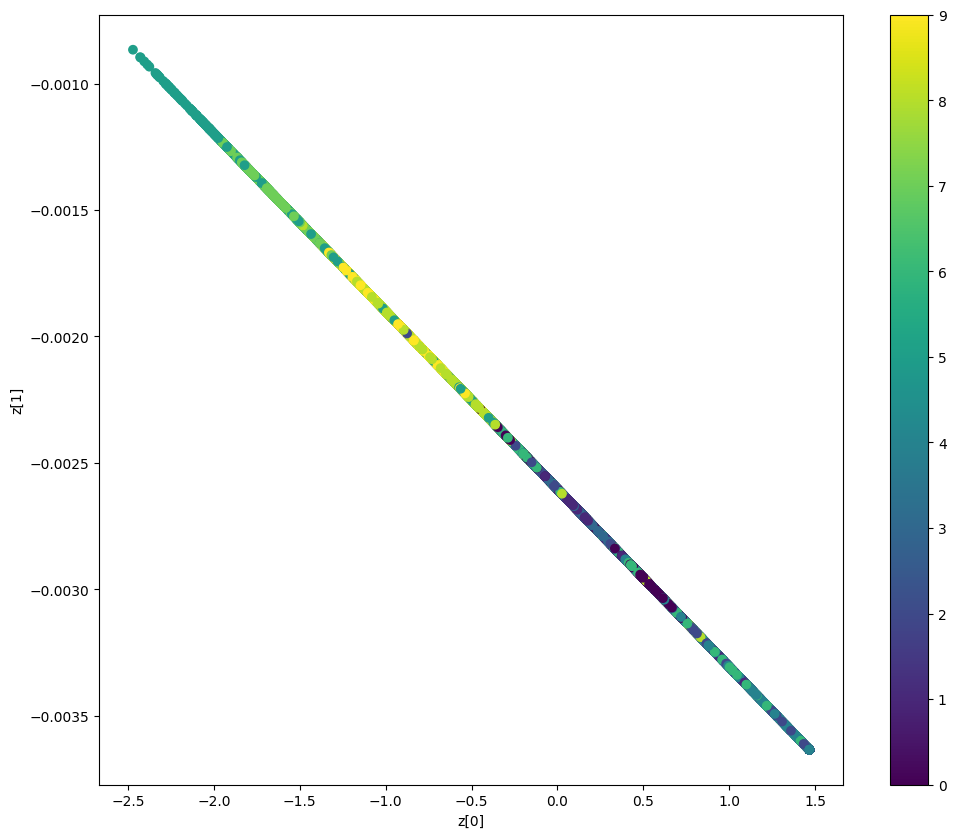

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━

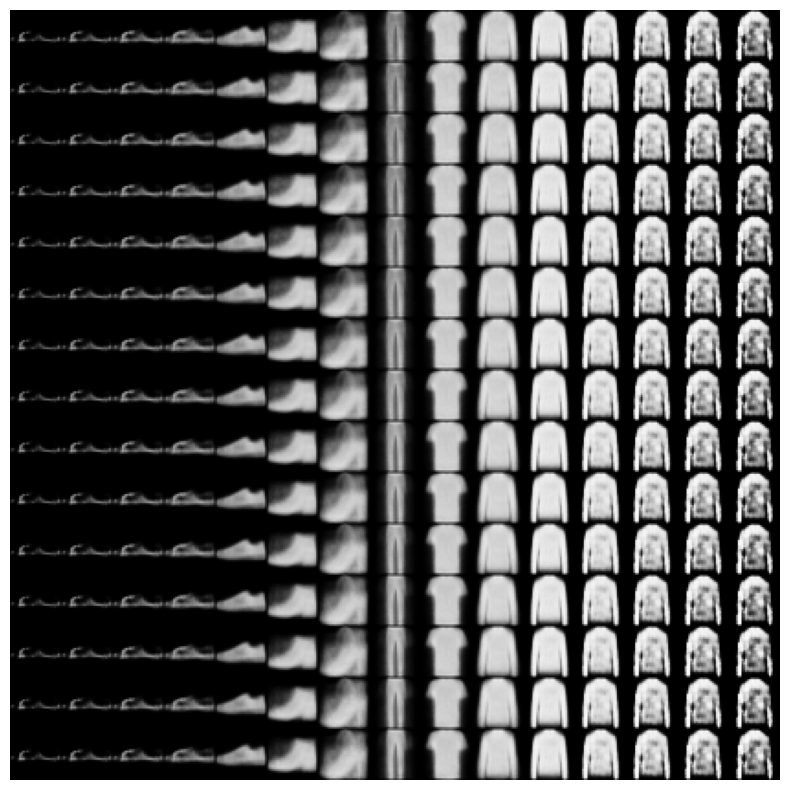

In [ ]:
# --- Imports ---
import numpy as np
import tensorflow as tf
from keras import ops, Model
from keras.layers import Input, Conv2D, Flatten, Dense, Reshape, Conv2DTranspose, Lambda
from keras.losses import binary_crossentropy
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

# --- Data ---
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

image_size = x_train.shape[1]
x_train = np.reshape(x_train, [-1, image_size, image_size, 1]).astype("float32") / 255
x_test = np.reshape(x_test, [-1, image_size, image_size, 1]).astype("float32") / 255

latent_dim = 2  # Latent space dimension

# --- Sampling Layer ---
def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.random.normal(shape=(tf.shape(z_mean)[0], tf.shape(z_mean)[1]))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

# --- Encoder ---
inputs = Input(shape=(image_size, image_size, 1), name="encoder_input")
x = Conv2D(32, 3, activation="relu", strides=2, padding="same")(inputs)
x = Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = Flatten()(x)
x = Dense(16, activation="relu")(x)
z_mean = Dense(latent_dim, name="z_mean")(x)
z_log_var = Dense(latent_dim, name="z_log_var")(x)
z = Lambda(sampling, output_shape=(latent_dim,), name="z")([z_mean, z_log_var])
encoder = Model(inputs, [z_mean, z_log_var, z], name="encoder")

# --- Decoder ---
latent_inputs = Input(shape=(latent_dim,), name="z_sampling")
x = Dense(7 * 7 * 64, activation="relu")(latent_inputs)
x = Reshape((7, 7, 64))(x)
x = Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
outputs = Conv2DTranspose(1, 3, activation="sigmoid", padding="same", name="decoder_output")(x)
decoder = Model(latent_inputs, outputs, name="decoder")

# --- Custom VAE Model ---
class VAE(Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def call(self, inputs):
        z_mean, z_log_var, z = self.encoder(inputs)
        reconstructed = self.decoder(z)
        return reconstructed

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]

        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstructed = self.decoder(z)

            # Flatten for loss
            data_flat = ops.reshape(data, (ops.shape(data)[0], -1))
            recon_flat = ops.reshape(reconstructed, (ops.shape(reconstructed)[0], -1))

            # Reconstruction loss
            reconstruction_loss = ops.sum(binary_crossentropy(data_flat, recon_flat), axis=-1)

            # KL divergence
            kl_loss = -0.5 * ops.sum(1 + z_log_var - ops.square(z_mean) - ops.exp(z_log_var), axis=-1)

            total_loss = ops.mean(reconstruction_loss + kl_loss)

        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        return {"loss": total_loss}

    def test_step(self, data):
        if isinstance(data, tuple):
            data = data[0]
        z_mean, z_log_var, z = self.encoder(data)
        reconstructed = self.decoder(z)
        data_flat = ops.reshape(data, (ops.shape(data)[0], -1))
        recon_flat = ops.reshape(reconstructed, (ops.shape(reconstructed)[0], -1))
        reconstruction_loss = ops.sum(binary_crossentropy(data_flat, recon_flat), axis=-1)
        kl_loss = -0.5 * ops.sum(1 + z_log_var - ops.square(z_mean) - ops.exp(z_log_var), axis=-1)
        total_loss = ops.mean(reconstruction_loss + kl_loss)
        return {"loss": total_loss}

# --- Instantiate and Compile ---
vae = VAE(encoder, decoder)
vae.compile(optimizer="adam")

# --- Train ---
vae.fit(x_train, epochs=30, batch_size=128, validation_data=(x_test, None))

# --- Latent Space Visualization ---
def plot_label_clusters(encoder, data, labels):
    z_mean, _, _ = encoder.predict(data)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=labels)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.show()

plot_label_clusters(encoder, x_test, y_test)

# --- Manifold Visualization ---
n = 15
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
grid_x = np.linspace(-4, 4, n)
grid_y = np.linspace(-4, 4, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size:(i + 1) * digit_size,
               j * digit_size:(j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap="Greys_r")
plt.axis("off")
plt.show()


## Answer 14:

### Interpretation:

The resulting latent plot shows a near-linear relationship between $z_{0}$ and z_{1}, indicating posterior collapse. The model learned a degenerate 1-D latent space instead of a 2-D manifold. This typically occurs when the KL-divergence term overwhelms the reconstruction loss. Adjusting the $\beta$-weight, increasing latent dimensionality and lowering the learning rate can restore proper latent separation.